# Improving CNN Generalization: Preventing Overfitting with Data Augmentation and Dropout

This notebook explores techniques to **enhance the generalization ability of a Convolutional Neural Network (CNN)** by addressing overfitting.  
We implement **data augmentation** and **dropout** to improve model performance and remove the curse of overfitting.

### **Key Objectives:**
- Train a CNN model for **image classification** (Cats vs. Dogs).
- Interpret the training results through plot visualisation: loss vs epoch and accuracy vs epoch.
- Apply **data augmentation** to increase dataset diversity and robustness.
- Introduce **dropout** to prevent the model from over-relying on specific neurons.


# Downloading dataset
Downloading cats_vs_dogs dataset from google drive location:

In [1]:
import matplotlib.pyplot as plt
import os
import zipfile
try:
    import gdown
except ImportError:
    !pip install gdown

def download_dataset_from_google_drive(google_file_id: str, output_file_name: str, quiet_download: bool) -> str:
    file_path = f'./{output_file_name}'

    if not os.path.exists(file_path):
        gdown.download(id=google_file_id, output=output_file_name, quiet=quiet_download)
    else:
        print(f"{output_file_name} already exists!")
    if os.path.exists(file_path):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall('./')
    return file_path

In [2]:
# https://drive.google.com/file/d/1ri_BeyDpe_eGy-WRFqQ-yGiUcvnEl4Ah/view?usp=sharing
data_path = "1ri_BeyDpe_eGy-WRFqQ-yGiUcvnEl4Ah"

In [3]:
data_dir = download_dataset_from_google_drive(data_path, "data.zip", True)

# Building the CNN Architecture
1. <b>Rescaling Layer</b> – Normalizes pixel values from [0, 255] to [0, 1] for stable training.
2. <b>Convolutional Layers (3×3 filters)</b> – Extracts hierarchical features using varying filter sizes with the ReLU activation function.
3. <b>MaxPooling Layer (2×2)</b> – Reduces spatial dimensions while preserving dominant features
4. <b>Global Average Pooling</b> – Aggregates all values to get an average value.
5. <b>Dense Layer</b> – Applies sigmoid function to the value for classification purposes

In [4]:
import keras
from keras import layers
inputs = keras.Input(shape=(180, 180, 3))     #1
x = layers.Rescaling(1./255)(inputs)         #2
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)  #3
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,569,089 (5.99 MB)

 Trainable params: 1,569,089 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

Defining Loss function and weight updation strategy

In [6]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Loading the image dataset
--Images are processed in a batch of 64 and resized to 180x180.\
--Images are labelled based on their folders (cat and dog) for train and validation separately.

In [7]:
from keras.utils import image_dataset_from_directory
batch_size = 64
image_size = (180, 180)
train_dataset = image_dataset_from_directory(
    "./cats_vs_dogs/train/",
    image_size=image_size,
    batch_size=batch_size)
validation_dataset = image_dataset_from_directory(
    "./cats_vs_dogs/validation/",
    image_size=image_size,
    batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


# Training the model on the dataset
During training, using validation loss performance, the optimal model is saved using callbacks.

In [8]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step - accuracy: 0.5170 - loss: 0.7042 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.5400 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.7572
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.5246 - loss: 0.6984 - val_accuracy: 0.5210 - val_loss: 0.6864
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.5331 - loss: 0.6873 - val_accuracy: 0.6090 - val_loss: 0.6570
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.5775 - loss: 0.6795 - val_accuracy: 0.6040 - val_loss: 0.6402
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6564 - loss: 0.6385 - val_accuracy: 0.6710 - val_loss: 0.6056
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6518 - loss: 0.6195 - val_accuracy: 0.6730 - val_loss: 0.6003
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6746 - loss: 0.6050 - val_accuracy: 0.691

# Plotting the overall performance
Plotting training and validation accuracy and loss to monitor if the model has correctly learnt the features and has not overfitted. \
1. Validation accuracy stagnates with number of epochs
2. Validation loss increases
3. Training accuracy is almost 100% and loss is zero.

This suggests that the model is too complex to have the learnt the features and has overfitted.


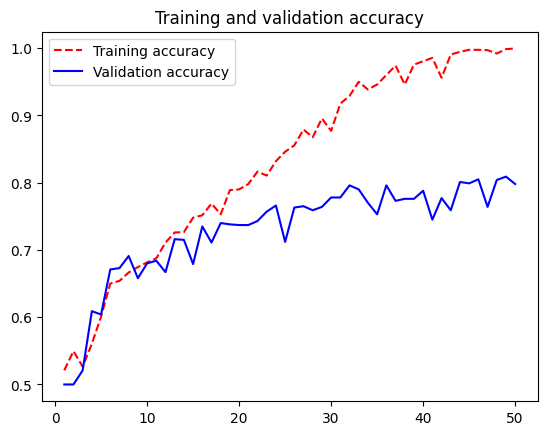

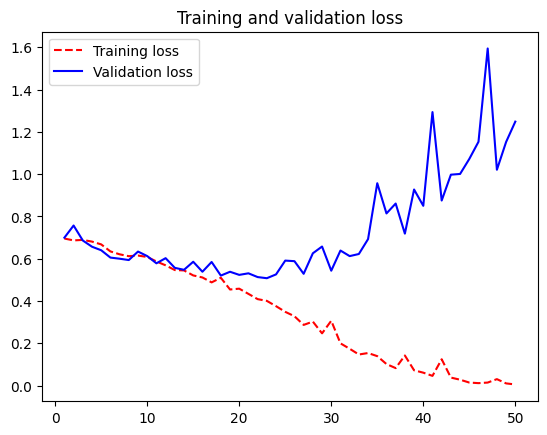

In [9]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Fighting the menace of overfitting
We can address the problem of overfitting and generalise our model by introducing:
1. Data augmentation
2. Adding dropout to the model

# Data Augmentation

- **Purpose**: Data augmentation introduces **slight variations** in the dataset during each epoch, preventing the model from memorizing the training data and instead learning **robust, generalizable features**.
- **Techniques Used**:
  1. **Random Rotation** – Rotates the image slightly to simulate different viewing angles.
  2. **Random Zoom** – Zooms in on the image to help the model focus on different levels of detail.



In [10]:
import tensorflow as tf
data_augmentation_layers = [   #1
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
]
def data_augmentation(images, targets):  #2
    for layer in data_augmentation_layers:
        images = layer(images)
    return images, targets
augmented_train_dataset = train_dataset.map(data_augmentation, num_parallel_calls=8)  #3
augmented_train_dataset = augmented_train_dataset.prefetch(tf.data.AUTOTUNE) #4

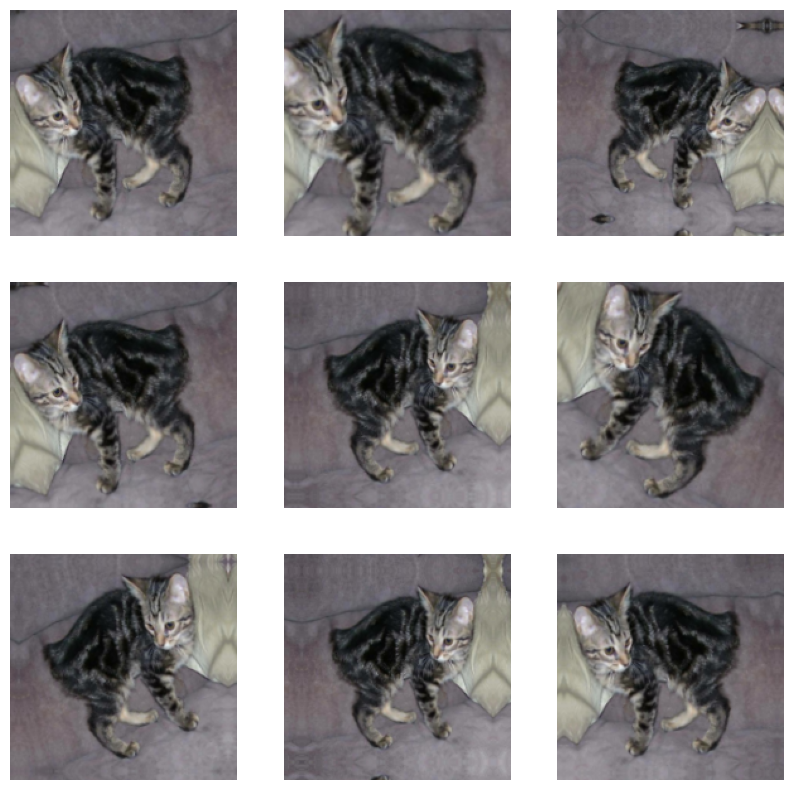

In [11]:
import numpy as np
plt.figure(figsize=(10, 10))
for image_batch, _ in train_dataset.take(1):  #1
    image = image_batch[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image, _ = data_augmentation(image, None)
        plt.imshow(np.array(augmented_image).astype("uint8"))  #2
        plt.axis("off")

# Adding Dropout

- **Purpose**: Dropout helps prevent **overfitting** by randomly **dropping neurons** during training, ensuring the model does not rely too heavily on specific features.
- **How It Works**:
  - During each training iteration, a fraction of neurons is **randomly deactivated** [here we deactivate 25% of the neurons]
  - This forces the model to learn **redundant and robust representations** rather than memorizing patterns.



In [12]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    augmented_train_dataset,
    epochs=100,  #1
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - accuracy: 0.5034 - loss: 0.6987 - val_accuracy: 0.5050 - val_loss: 0.6926
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 410ms/step - accuracy: 0.5216 - loss: 0.6926 - val_accuracy: 0.6070 - val_loss: 0.6863
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 402ms/step - accuracy: 0.5779 - loss: 0.6869 - val_accuracy: 0.6160 - val_loss: 0.6832
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.5839 - loss: 0.6812 - val_accuracy: 0.6420 - val_loss: 0.6552
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.6055 - loss: 0.6654 - val_accuracy: 0.6350 - val_loss: 0.6474
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.5619 - loss: 0.6832 - val_accuracy: 0.5130 - val_loss: 0.7036
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 415ms/step - accuracy: 0.5765 - loss: 0.6678 - val_accuracy: 0.6290 - val_loss: 0.6529
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 417ms/step - accuracy: 0.6324 - loss: 0.6413 - 

# Plotting the Results

1. **Validation accuracy increases** along with training accuracy.
2. **Validation loss decreases** as the number of epochs increase.

### Conclusion: Data Augmentation and Dropout Successfully Reduced Overfitting
- The model now **generalizes better** to unseen data.
- Overfitting is **alleviated**, as the gap between training and validation accuracy has reduced.
- **Dropout** has **balanced learning**, preventing the model from relying too much on specific neurons.
- **Data augmentation** has introduced **variations in training images**, ensuring the model learns **robust features** rather than memorizing patterns.


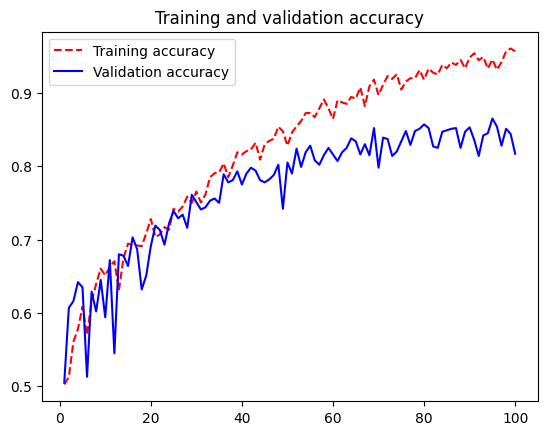

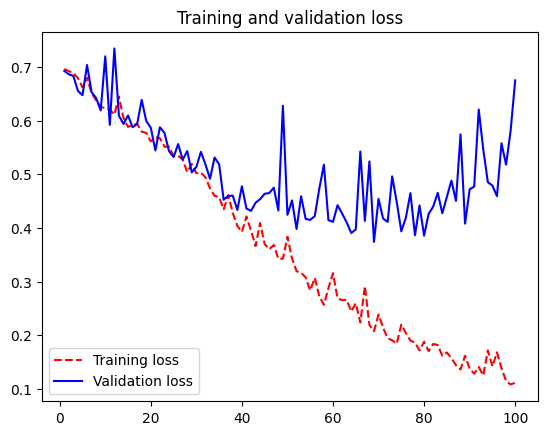

In [14]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()